In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import glob
from scipy.stats import wilcoxon
from scipy.spatial.distance import jensenshannon
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.manifold import TSNE

global_palette = {'Raw':'#4c72b0', 'Restrictive':'#dd8452',
                  'Decontam':'#55a868', 'SCRUB':'#c44e52', 'SCRuB':'#c44e52', 
                  'Decontam (Low Biomass)':'darkgreen',
                  'Decontam (LB)':'darkgreen',
                  'Decontam_LB':'darkgreen',
                  'Restrictive (Original)':'#dd8452',
                  'Input':'#4c72b0',
                  'No decontamination':'#4c72b0', 
                  'microDecon':'purple'}
sns.set_theme(font_scale=2)

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 
            'axes.edgecolor':'black', 
           'grid.color': 'black'}, 
       font_scale=2)

In [178]:
sample_locs = pd.wide_to_long(
        pd.DataFrame(np.array( [a.split('\t') for a in 
        """A	SK1	SK3	VG3	SV6	SK7	Lib_neg_2_9	ZST1	ZST3	ZST4	ZSV1	ZSV2	ZSV3
        B	ST1	neg2_1	ST4	neg2_4	ST6	V3SV1	ZST2	zneg2_1	ZST5	ZSV4	zneg2_5	ZSV5
        C	Lib_neg2_1	SV3	neg2_3	SK5	Lib_neg2_4	V3SV2	ZST6	zneg2_2	ZST7	ZSV6	zneg2_6	ZSV7
        D	SV1	Lib_neg_2_2	SV5	neg2_5	VG6	V3SV3	ZSK1	ZSK2	ZSK3	ZVG1	ZVG2	ZVG3
        E	SV2	ST3	VG4	ST5	ST7	V3SV4	ZSK4	neg2_3_2	ZSK5	ZVG4	zneg2_7	ZVG5
        F	VG1	neg2_2	SK4	neg2_6	SV7	V3SV5	ZSK6	zneg2_4	ZSK7	ZVG6	zneg2_8	ZVG7
        G	SK2	VG2	Lib_neg2_3	SK6	neg2_8	V3SV6	Lib_neg2_5	Lib_neg2_6	B_1	Lib_neg2_7	Lib_neg2_8	B_2
        H	ST2	SV4	VG5	neg2_7	VG7	V3SV7	clin_neg11	neg2_9	neg2_10	clin_neg12	zneg2_9	zneg2_10""".split('\n')
        ] ), columns=['X{}'.format(a) if a >0 else 'row' for a in range(13)] ), 
    stubnames='X',
    i = 'row',
    j = 'loc').reset_index()

sample_locs['plate_loc'] = sample_locs['row'] + sample_locs['loc'].astype(str)
sample_locs.row=sample_locs.row.str.strip()

In [179]:
library_dist_df=pd.DataFrame( {row[1].X:(ord(row[1].row)-64, row[1]['loc'])
      for row in sample_locs.iterrows() } ).T

pairwise = pd.DataFrame(
    squareform(pdist(library_dist_df)),
    columns = library_dist_df.index,
    index = library_dist_df.index
)

In [180]:
lib_negs=['Lib_neg2_1_S39',
          'Lib_neg_2_2_S37', 
          'Lib_neg2_3_S40', 
          'Lib_neg2_4_S41'
         ]

In [183]:
tps=['VG', 'ST', 'SK', 'SV']
lib_nearby_cont_smp_jsds=[]
lib_tp_list=[]
for lib_smp_nm in lib_negs:
    for a in raw_data.loc[raw_data.index==lib_smp_nm].iterrows():
        nearby_smps = pairwise.loc[ ( pairwise.loc[lib_smp_nm[:-4]]<1.5 ) ].index
        for ns in nearby_smps:
            if 'neg' not in ns:
                dist= jensenshannon(raw_data.loc[
                    raw_data.index.str.startswith(ns)].values.astype(float)[0],
                                    a[1].values.astype(float) )

                lib_nearby_cont_smp_jsds.append(dist)
                lib_tp_list.append(a[0][:2])

In [184]:
lib_far_cont_smp_jsds=[]
lib_tp_list=[]

for a in raw_data.loc[raw_data.index.str.contains('Lib_neg2_7_S44|Lib_neg2_8_S45')].iterrows():
    for ns in sample_locs.loc[sample_locs['loc']<=6].X.values:
        if 'neg' not in ns:
            dist= jensenshannon(raw_data.loc[
                raw_data.index.str.startswith(ns)].values.astype(float)[0],
                                a[1].values.astype(float) )

            lib_far_cont_smp_jsds.append(dist)
            lib_tp_list.append(a[0][:2])

/Users/george/opt/anaconda3/envs/qiime2-dev/lib/python3.8/site-packages/scipy/spatial/distance.py:1295: RuntimeWarning: invalid value encountered in divide
  q = q / np.sum(q, axis=axis, keepdims=True)
/Users/george/opt/anaconda3/envs/qiime2-dev/lib/python3.8/site-packages/scipy/spatial/distance.py:1294: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)


In [265]:
sample_locs = pd.wide_to_long(
        pd.DataFrame(np.array( [a.split('\t') for a in 
        """A	SK1	SK3	VG3	SV6	SK7	Lib_neg_2_9	ZST1	ZST3	ZST4	ZSV1	ZSV2	ZSV3
        B	ST1	neg2_1	ST4	neg2_4	ST6	V3SV1	ZST2	zneg2_1	ZST5	ZSV4	zneg2_5	ZSV5
        C	Lib_neg2_1	SV3	neg2_3	SK5	Lib_neg2_4	V3SV2	ZST6	zneg2_2	ZST7	ZSV6	zneg2_6	ZSV7
        D	SV1	Lib_neg_2_2	SV5	neg2_5	VG6	V3SV3	ZSK1	ZSK2	ZSK3	ZVG1	ZVG2	ZVG3
        E	SV2	ST3	VG4	ST5	ST7	V3SV4	ZSK4	neg2_3_2	ZSK5	ZVG4	zneg2_7	ZVG5
        F	VG1	neg2_2	SK4	neg2_6	SV7	V3SV5	ZSK6	zneg2_4	ZSK7	ZVG6	zneg2_8	ZVG7
        G	SK2	VG2	Lib_neg2_3	SK6	neg2_8	V3SV6	Lib_neg2_5	Lib_neg2_6	B_1	Lib_neg2_7	Lib_neg2_8	B_2
        H	ST2	SV4	VG5	neg2_7	VG7	V3SV7	clin_neg11	neg2_9	neg2_10	clin_neg12	zneg2_9	zneg2_10""".split('\n')
        ] ), columns=['X{}'.format(a) if a >0 else 'row' for a in range(13)] ), 
    stubnames='X',
    i = 'row',
    j = 'loc').reset_index()

extraction_locs = sample_locs.loc[ (sample_locs['loc']<7)&\
                 (sample_locs.X.str.contains('Lib')==False)]

extraction_locs['plate_loc'] = extraction_locs['row'] + extraction_locs['loc'].astype(str)
extraction_locs['row'] =extraction_locs['row'].str.strip()


/var/folders/60/0byq_5yx2jbgs0cn6s5s2y7r0000gn/T/ipykernel_75445/1421691168.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extraction_locs['plate_loc'] = extraction_locs['row'] + extraction_locs['loc'].astype(str)
/var/folders/60/0byq_5yx2jbgs0cn6s5s2y7r0000gn/T/ipykernel_75445/1421691168.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extraction_locs['row'] =extraction_locs['row'].str.strip()


In [266]:
extraction_locs=extraction_locs.loc[extraction_locs.X.isin(['1', 'XXXX'])==False]

In [267]:
extraction_dist_df=pd.DataFrame( {row[1].X:(ord(row[1].row)-64, row[1]['loc'])
      for row in extraction_locs.iterrows() } ).T

extraction_pairwise = pd.DataFrame(
    squareform(pdist(extraction_dist_df)),
    columns = extraction_dist_df.index,
    index = extraction_dist_df.index
)

In [268]:
extract_nearby_cont_smp_jsds=[]
nearby_ext_comps =[]
for extract_smp_nm in extraction_pairwise.loc[extraction_pairwise.index.str.contains('neg')].index:
    for a in raw_data.loc[raw_data.index.str.startswith(extract_smp_nm)].iterrows():
        nearby_smps = extraction_pairwise.loc[ 
                        ( extraction_pairwise.loc[extract_smp_nm]<1.5 ) ].index
        for ns in nearby_smps:
            if 'neg' not in ns:
                dist= jensenshannon(raw_data.loc[
                    raw_data.index.str.startswith(ns)].values.astype(float)[0],
                                    a[1].values.astype(float) )

                extract_nearby_cont_smp_jsds.append(dist)
                nearby_ext_comps.append(ns)

/Users/george/opt/anaconda3/envs/qiime2-dev/lib/python3.8/site-packages/scipy/spatial/distance.py:1294: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)


In [271]:
extract_far_cont_smp_jsds=[]
lib_tp_list=[]
for a in raw_data.loc[raw_data.index.str.contains('neg2_10_S47|neg2_9_S56')].iterrows():
    for ns in np.unique(nearby_ext_comps):#sample_locs.loc[sample_locs['loc']<=6].X.values:
        if 'neg' not in ns:
            dist= jensenshannon(raw_data.loc[
                raw_data.index.str.startswith(ns)].values.astype(float)[0],
                                a[1].values.astype(float) )

            extract_far_cont_smp_jsds.append(dist)


In [278]:
groupings= ['Library, Far']*len( lib_far_cont_smp_jsds ) + \
    ['Library, near']*len( lib_nearby_cont_smp_jsds) +\
    ['Extraction, far']*len( extract_far_cont_smp_jsds) +\
    ['Extraction, near']*len( extract_nearby_cont_smp_jsds)

In [279]:
np.unique(groupings)

array(['Extraction, far', 'Extraction, near', 'Library, Far',
       'Library, near'], dtype='<U16')

In [280]:
from scipy.stats import mannwhitneyu

/Users/george/opt/anaconda3/envs/qiime2-dev/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/opt/anaconda3/envs/qiime2-dev/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/opt/anaconda3/envs/qiime2-dev/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/opt/anaconda3/envs/qiime2-dev/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Us

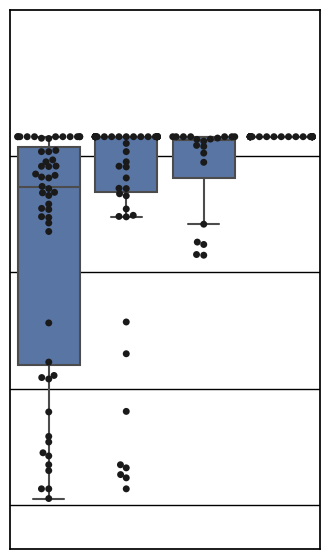

In [340]:
plt.figure(figsize=(4,7))
ax=sns.boxplot(x=groupings, 
           y = lib_far_cont_smp_jsds+lib_nearby_cont_smp_jsds+\
                 extract_far_cont_smp_jsds + extract_nearby_cont_smp_jsds, 
           color=global_palette['No decontamination'], 
               order=['Extraction, near', 
                      'Extraction, far',
                      'Library, near',
                      'Library, Far'
                     ],
               fliersize=0
          )
sns.swarmplot(x=groupings, 
           y = lib_far_cont_smp_jsds+lib_nearby_cont_smp_jsds+\
               extract_far_cont_smp_jsds + extract_nearby_cont_smp_jsds, 
           color='k', 
              order=['Extraction, near', 
                      'Extraction, far',
                      'Library, near',
                      'Library, Far'
                     ],
            size=5
          )



tmp = pd.DataFrame({ nm: mannwhitneyu( np.array(x)[np.isnan(np.array(x))==False],
np.array(extract_nearby_cont_smp_jsds)[np.isnan(np.array(extract_nearby_cont_smp_jsds))==False],
                                        ).pvalue
               for nm, x in zip( ['Extraction, far',
                                  'Library, near',
                                  'Library, Far'],
                               [extract_far_cont_smp_jsds,
                                lib_nearby_cont_smp_jsds,
                                lib_far_cont_smp_jsds
                                ])\
              }, 
            index=['pvalue']).T.reset_index()

tmp['y_val'] = 0.17

q=tmp.copy()
q['is_sig']=q.pvalue<0.05

hide_axes=True
if hide_axes:
        plt.xlabel(None)
        plt.ylabel(None)
        plt.xticks([])
        plt.ylim(0.125, 1.05)
        plt.yticks([ 0.2, 0.4, 0.6, 0.8], labels=[])

In [183]:
from scipy.stats import mannwhitneyu

In [138]:
mannwhitneyu(np.array(lib_nearby_cont_smp_jsds)[np.isnan(lib_nearby_cont_smp_jsds)==False], 
            np.array(lib_far_cont_smp_jsds)[ np.isnan(lib_far_cont_smp_jsds) == False ], 
#             alternative='less'
            )

MannwhitneyuResult(statistic=149.0, pvalue=0.00012038129837624416)

In [139]:
mannwhitneyu(np.array(extract_nearby_cont_smp_jsds)[np.isnan(extract_nearby_cont_smp_jsds)==False], 
            np.array(lib_far_cont_smp_jsds)[ np.isnan(lib_far_cont_smp_jsds) == False ], 
#             alternative='less'
            )

MannwhitneyuResult(statistic=244.0, pvalue=8.219116675208432e-10)

In [341]:
mannwhitneyu(np.array(extract_nearby_cont_smp_jsds)[np.isnan(extract_nearby_cont_smp_jsds)==False], 
            np.array(lib_nearby_cont_smp_jsds)[ np.isnan(lib_nearby_cont_smp_jsds) == False ], 
#             alternative='less'
            )

MannwhitneyuResult(statistic=326.5, pvalue=0.014985576643903395)

In [342]:
mannwhitneyu(np.array(extract_nearby_cont_smp_jsds)[np.isnan(extract_nearby_cont_smp_jsds)==False], 
            np.array(extract_far_cont_smp_jsds)[ np.isnan(extract_far_cont_smp_jsds) == False ], 
#             alternative='less'
            )



MannwhitneyuResult(statistic=915.5, pvalue=0.0016510158419419533)

In [142]:
mannwhitneyu(np.array(extract_far_cont_smp_jsds)[np.isnan(extract_far_cont_smp_jsds)==False], 
            np.array(lib_nearby_cont_smp_jsds)[ np.isnan(lib_nearby_cont_smp_jsds) == False ], 
#             alternative='less'
            )



MannwhitneyuResult(statistic=571.0, pvalue=0.6984737962593174)

In [143]:
mannwhitneyu(np.array(extract_far_cont_smp_jsds)[np.isnan(extract_far_cont_smp_jsds)==False], 
            np.array(lib_far_cont_smp_jsds)[ np.isnan(lib_far_cont_smp_jsds) == False ], 
#             alternative='less'
            )

MannwhitneyuResult(statistic=516.0, pvalue=6.406969323636855e-05)